In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import sys
sys.path.insert(0, "/notebooks/")
from fastai.imports import *

In [2]:
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [3]:
PATH = "/notebooks/data/downloads/"
sz=224

torch.cuda.is_available()

torch.backends.cudnn.enabled

In [6]:
os.listdir(PATH)

['Soccer', 'American']

In [14]:
american_path = (PATH + "American/")
soccer_path = (PATH + "Soccer/")
american_files = os.listdir(american_path)
soccer_files = os.listdir(soccer_path)

In [15]:
num_american = len(american_files)
num_soccer = len(soccer_files)

In [13]:
from shutil import copyfile

In [18]:
american_train = "/notebooks/data/football/train/American/"
soccer_train = "/notebooks/data/football/train/Soccer/"
american_valid = "/notebooks/data/football/valid/American/"
soccer_valid = "/notebooks/data/football/valid/Soccer/"

In [19]:
for i, filename in enumerate(american_files):
    if i < (num_american * 0.8):
        copyfile(american_path + filename, american_train + filename)
    else:
        copyfile(american_path + filename, american_valid + filename)

In [20]:
for i, filename in enumerate(soccer_files):
    if i < (num_soccer * 0.8):
        copyfile(soccer_path + filename, soccer_train + filename)
    else:
        copyfile(soccer_path + filename, soccer_valid + filename)

In [21]:
FOOTBALL_PATH = "/notebooks/data/football/"

In [23]:
soccer_train_files = os.listdir(soccer_train) 

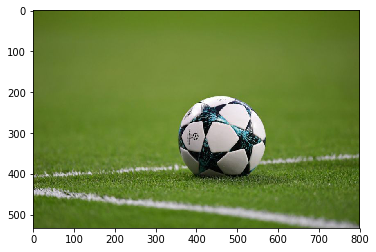

In [25]:
img = plt.imread(f'{soccer_train}{soccer_train_files[0]}')
plt.imshow(img);

In [26]:
img.shape

(533, 800, 3)

In [27]:
img[:4,:4]

array([[[ 77, 105,  20],
        [ 77, 105,  20],
        [ 77, 105,  20],
        [ 77, 105,  20]],

       [[ 77, 105,  20],
        [ 77, 105,  20],
        [ 77, 105,  20],
        [ 77, 105,  20]],

       [[ 76, 104,  19],
        [ 76, 104,  19],
        [ 76, 104,  19],
        [ 77, 105,  20]],

       [[ 75, 103,  18],
        [ 75, 103,  18],
        [ 76, 104,  19],
        [ 76, 104,  19]]], dtype=uint8)

In [ ]:
import pdb
pdb.settrace()
arch=resnet34
data = ImageClassifierData.from_paths(PATH, tfms=tfms_from_model(arch, sz))
learn = ConvLearner.pretrained(arch, data, precompute=True)
learn.fit(0.01, 2)

In [31]:
data.val_y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [32]:
data.classes

['American', 'Soccer']